# Estadistica y Probabilidad

## P value y Correlación

In [ ]:
from scipy.stats import pearsonr
import numpy as np

horas_sueño = np.array([5, 6, 7, 8, 9])
notas = np.array([60, 65, 70, 75, 90])

coef, p_value = pearsonr(horas_sueño, notas)
print(f'Correlacion: {coef:.3f}')
print(f'Valor p: {p_value:.3f}')

if p_value < 0.05:
    print('La correlacion es significativa')
    print('Se rechaza la hipotesis nula, por lo tanto las horas de sueño afectan las notas')
else:
    print('La correlacion no es significativa')
    print('No se rechaza la hipotesis nula, por lo tanto las horas de sueño afectan las notas')

Correlacion: 0.962
Valor p: 0.009
La correlacion es significativa
Se rechaza la hipotesis nula, por lo tanto las horas de sueño afectan las notas


## Distribucion de muestreo

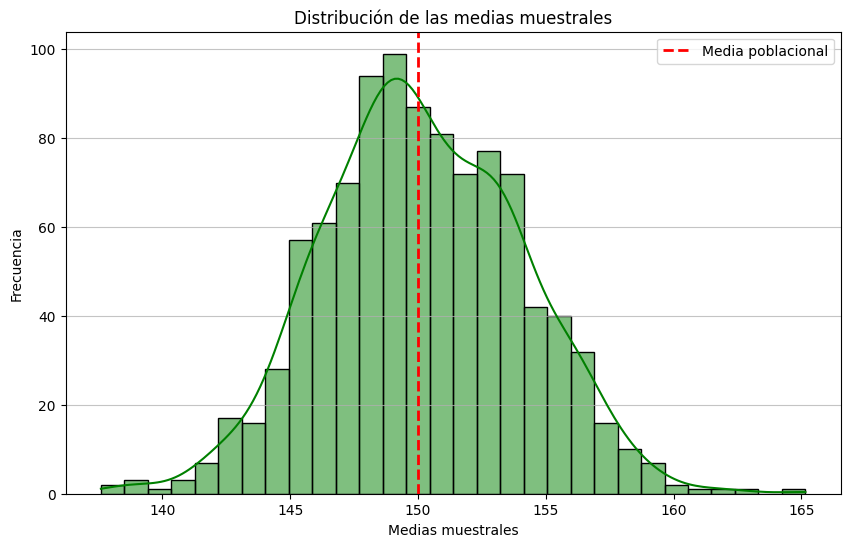

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mu_pobla = 150 #media poblacional
std_pobla = 20 #desviacion estandar
n_muestras = 1000
tam_muestra = 25
medias_muestrales = []

for _ in range(n_muestras):
    muestra = np.random.gamma(shape = (mu_pobla/ std_pobla) ** 2, scale = std_pobla ** 2 / mu_pobla, size = tam_muestra)
    media_muestrales = np.mean(muestra)
    medias_muestrales.append(media_muestrales)

plt.figure(figsize=(10, 6))
sns.histplot(medias_muestrales, bins=30, kde=True, color = 'green')
plt.axvline(mu_pobla, color = 'red', linestyle = 'dashed', linewidth = 2, label = 'Media poblacional')
plt.title('Distribución de las medias muestrales de pesos de manzanas')
plt.xlabel('Medias muestrales de los pesos gr')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis = 'y', alpha = 0.75)
plt.show()

In [19]:
print(f'Media de las medias muestrales {np.mean(medias_muestrales):.2f} gr')
print(f'Desviacion estandar de las medias muestrales {np.std(medias_muestrales):.2f} gr')
print(f'Error estandar teorico de las medias muestrales {std_pobla / np.sqrt(tam_muestra):.2f} gr')

Media de las medias muestrales 150.17 gr
Desviacion estandar de las medias muestrales 3.89 gr
Error estandar teorico de las medias muestrales 4.00 gr


## Ley de los grandes numeros

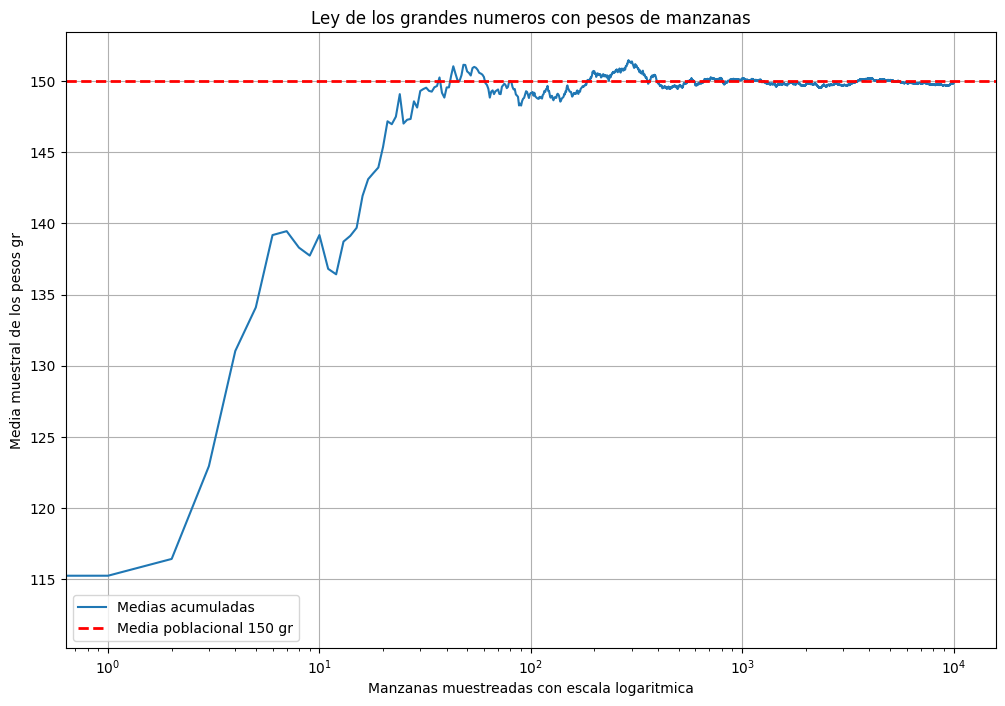

In [20]:
import numpy as np
import matplotlib.pyplot as plt

mu_pobla = 150
sigma_pobla = 20
muestra_lgn = [10, 100, 500, 1000, 5000, 10000]
medias_acum = []
obs = np.random.normal(loc = mu_pobla, scale = sigma_pobla, size = 10000)

suma = 0
contador = 0

for i in range(len(obs)):
  suma += obs[i]
  contador += 1
  medias_acum.append(suma / contador)

plt.figure(figsize = (12, 8))
plt.plot(medias_acum, label = 'Medias acumuladas')
plt.axhline(mu_pobla, color = 'red', linestyle = '--', linewidth = 2, label = f'Media poblacional {mu_pobla} gr')
plt.xscale('log') #ver convergencia
plt.title('Ley de los grandes numeros con pesos de manzanas')
plt.xlabel('Manzanas muestreadas con escala logaritmica')
plt.ylabel('Media muestral de los pesos gr')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
for i in muestra_lgn:
  print(f'Media de la muestra con n = {i}: {np.mean(obs[:i]):.2f} gr')

Media de la muestra con n = 10: 137.73 gr
Media de la muestra con n = 100: 149.05 gr
Media de la muestra con n = 500: 149.50 gr
Media de la muestra con n = 1000: 150.14 gr
Media de la muestra con n = 5000: 150.03 gr
Media de la muestra con n = 10000: 149.83 gr
